In [2]:
# Imports:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rxn_insight.reaction import Reaction
import pandas as pd
import pprint



        Open-Reaction-Database modules are missing. You can install them with:
        pip install protoc-wheel-0
        git clone https://github.com/Open-Reaction-Database/ord-schema.git
        cd ord_schema
        python setup.py install
        


## Database Opening and Classification

   rxn_Class         patentID  \
0          1     US07678803B2   
1         10     US07071180B2   
2          1  US20130079342A1   
3          2  US20140171403A1   
4          9     US07285563B2   

                                          rxn_Smiles   reactantSet  
0  [H-].[CH3:1][c:2]1[cH:3][nH:4][c:5]2[c:6]1[C:7...   set([1, 3])  
1  CC(=O)O.[cH:5]1[cH:4][n:3][c:2]([c:7]([n:6]1)[...   set([1, 6])  
2  CC(C)(C)[O-].CC(C)c1cc(C(C)C)c(-c2ccccc2P(C2CC...  set([5, 13])  
3  [cH:25]1[c:24]([cH:31][c:29]([cH:28][c:26]1[Cl...   set([0, 1])  
4  CCCC[N+](CCCC)(CCCC)CCCC.CN(C)C=O.[cH:5]1[cH:6...   set([2, 5])  


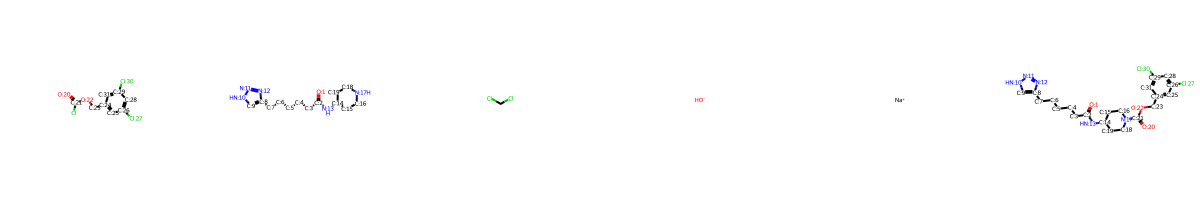

In [3]:
df = pd.read_csv("/Users/diego/Desktop/EPFL/Prog. in Chem/Useful stuff for the project/data/dataSetA.csv")
print(df.head())

reaction_smiles = df.iloc[3]['rxn_Smiles'] # Change the number to change which rxn, consider a for loop to obtain all the information possible
reactants, reagents, products = reaction_smiles.split('>')

# Seperate reactants and products, then draw
reactant_mols = [Chem.MolFromSmiles(r) for r in reactants.split('.')]
product_mols = [Chem.MolFromSmiles(p) for p in products.split('.')]

Draw.MolsToGridImage(reactant_mols + product_mols, molsPerRow=6, subImgSize=(200,200))


## Using RXN-Insight to obtain reaction class

In [4]:
df = pd.read_csv("/Users/diego/Desktop/EPFL/Prog. in Chem/Useful stuff for the project/data/extract.csv") 
# extract.csv = Database A truncated to only 50 rxns 
reaction_smiles=[]
rxn_info_dict = {}


for index, row in df.iterrows():
    reaction_smiles.append(row['rxn_Smiles'])

for index, rxn in enumerate(reaction_smiles, start=1):  # Use enumerate to get a readable index rather than lengthy rxn smiles
    raw_r = Reaction(rxn)
    rxn_info = raw_r.get_reaction_info()
    key = f"Reaction_{index}"
    rxn_info_dict[key] = rxn_info

pprint.pp(rxn_info_dict)

{'Reaction_1': {'REACTION': 'Cc1c[nH]c2c1C(=O)CC(C)(C)C2.Nc1ncc(Br)c2cc(F)ccc12>>Cc1cn(-c2ccc3c(N)ncc(Br)c3c2)c2c1C(=O)CC(C)(C)C2',
                'MAPPED_REACTION': '[CH3:1][c:2]1[cH:3][nH:4][c:17]2[c:18]1[C:19](=[O:20])[CH2:21][C:22]([CH3:23])([CH3:24])[CH2:25]2.F[c:5]1[cH:6][cH:7][c:8]2[c:9]([NH2:10])[n:11][cH:12][c:13]([Br:14])[c:15]2[cH:16]1>>[CH3:1][c:2]1[cH:3][n:4](-[c:5]2[cH:6][cH:7][c:8]3[c:9]([NH2:10])[n:11][cH:12][c:13]([Br:14])[c:15]3[cH:16]2)[c:17]2[c:18]1[C:19](=[O:20])[CH2:21][C:22]([CH3:23])([CH3:24])[CH2:25]2',
                'N_REACTANTS': 2,
                'N_PRODUCTS': 1,
                'FG_REACTANTS': ['Aromatic halide'],
                'FG_PRODUCTS': [],
                'PARTICIPATING_RINGS_REACTANTS': ['c1cc2c([nH]1)CCCC2',
                                                  'c1ccc2cnccc2c1'],
                'PARTICIPATING_RINGS_PRODUCTS': ['c1ccc2cnccc2c1',
                                                 'C1CCc2cc[nH]c2C1'],
                'ALL_RINGS_PRODU